Kullanılan Cihaz: cpu
Veri seti yüklendi! Toplam Görüntü: 1125
Sınıflar: ['Cloudy', 'Rain', 'Shine', 'Sunrise']

Model Mimarisi (SimpleCNN):

Eğitim Başlıyor (20 Epoch)...
Epoch [1/20] | Train Loss: 0.6489, Train Acc: %75.10 | Val Loss: 0.4504, Val Acc: %88.10
Epoch [2/20] | Train Loss: 0.3489, Train Acc: %88.69 | Val Loss: 0.3554, Val Acc: %90.48
Epoch [3/20] | Train Loss: 0.2467, Train Acc: %91.99 | Val Loss: 0.4322, Val Acc: %87.50
Epoch [4/20] | Train Loss: 0.1714, Train Acc: %94.28 | Val Loss: 0.4030, Val Acc: %87.50
Epoch [5/20] | Train Loss: 0.1092, Train Acc: %96.95 | Val Loss: 0.4179, Val Acc: %89.29
Epoch [6/20] | Train Loss: 0.0961, Train Acc: %96.70 | Val Loss: 0.3504, Val Acc: %91.07
Epoch [7/20] | Train Loss: 0.0556, Train Acc: %98.73 | Val Loss: 0.3845, Val Acc: %91.07
Epoch [8/20] | Train Loss: 0.0593, Train Acc: %98.22 | Val Loss: 0.3715, Val Acc: %89.29
Epoch [9/20] | Train Loss: 0.0280, Train Acc: %99.36 | Val Loss: 0.3650, Val Acc: %89.88
Epoch [10/20] | Train Loss:

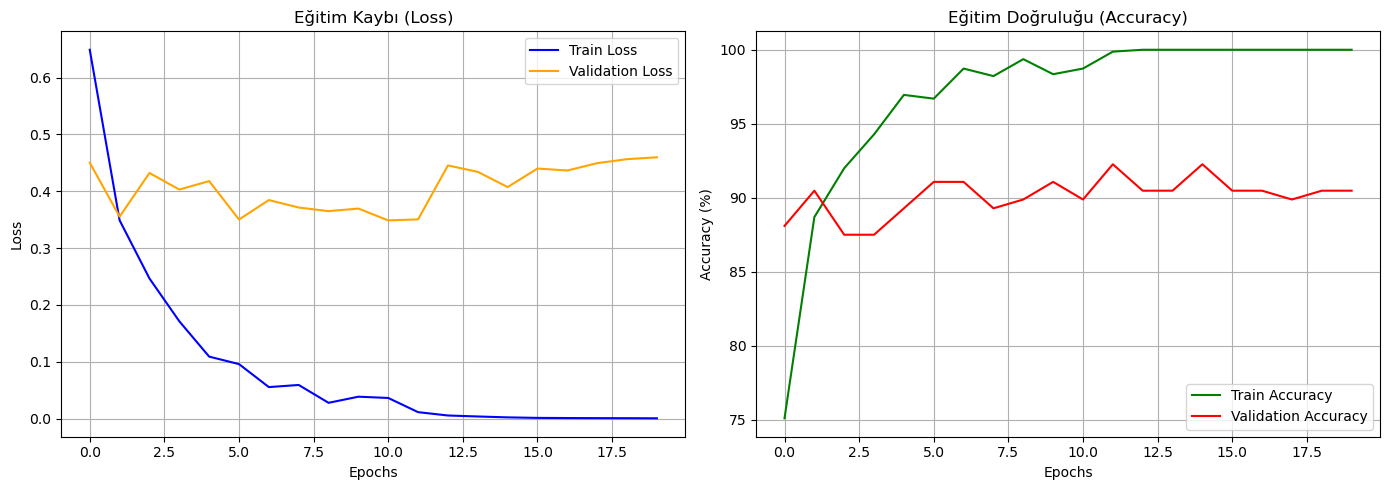


Test Seti Değerlendiriliyor...


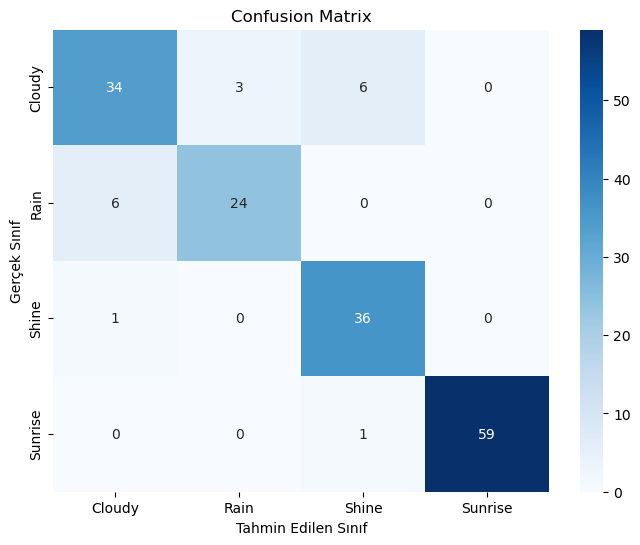


SONUÇ RAPORU (FORMAT 1: AÇIKLAMALI)
SimpleCNN
Test F1-Score (Ortalama) 0.90 Sınıflandırma performansının hassas ölçümü
Eğitim Doğruluğu (Train Accuracy) %100.00 Modelin eğitim verisini ne kadar iyi öğrendiği
Doğrulama Doğruluğu (Validation Accuracy) %90.48 Modelin genelleme yeteneği (Overfitting kontrolü)
Test Doğruluğu (Test Accuracy) %90.00 Modelin daha önce hiç görmediği verilerdeki nihai, tarafsız başarısı

SONUÇ RAPORU (FORMAT 2: LİSTE/CSV)
Metrik,Değer
Epoch,20
Train Loss,0.0007
Validation Loss,0.4598
Train Accuracy,1.0000
Validation Accuracy,0.9048
Test Accuracy,%90.00
Test Loss,0.4456

Detaylı Blok:
Epoch: 20
Train Loss (Eğitim Kaybı): 0.0007

Validation Loss (Doğrulama Kaybı): 0.4598

Train Accuracy (Eğitim Doğruluğu): 1.0000

Validation Accuracy (Doğrulama Doğruluğu): 0.9048


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Kullanılan Cihaz: {device}")

torch.manual_seed(42)

veri_yolu = "./dataset" 

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

try:
    dataset = datasets.ImageFolder(root=veri_yolu, transform=transform)
    print(f"Veri seti yüklendi! Toplam Görüntü: {len(dataset)}")
    print(f"Sınıflar: {dataset.classes}")
except Exception as e:
    print(f"HATA: Veri seti bulunamadı! Yol: {veri_yolu}")
    print("Lütfen 'veri_yolu' değişkenine doğru klasör yolunu yazdığından emin ol.")

if 'dataset' in locals():
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2) # 128 -> 64
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2) # 64 -> 32
        )
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 32 * 32, 64) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

if 'dataset' in locals():
    model = SimpleCNN(num_classes=len(dataset.classes)).to(device)
    print("\nModel Mimarisi (SimpleCNN):")

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    epochs = 20
    
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    print(f"\nEğitim Başlıyor ({epochs} Epoch)...")
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        avg_train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        
        avg_val_loss = val_loss / len(val_loader)
        val_acc = 100 * correct_val / total_val
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_train_loss:.4f}, Train Acc: %{train_acc:.2f} | Val Loss: {avg_val_loss:.4f}, Val Acc: %{val_acc:.2f}")


    plt.figure(figsize=(14, 5))
    
    # Grafik 1: Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='orange')
    plt.title('Eğitim Kaybı (Loss)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Grafik 2: Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy', color='green')
    plt.plot(val_accuracies, label='Validation Accuracy', color='red')
    plt.title('Eğitim Doğruluğu (Accuracy)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    # --- 6. Test Seti Değerlendirmesi ve Raporlama ---
    print("\nTest Seti Değerlendiriliyor...")
    model.eval()
    test_loss = 0.0  
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            
            # 1. Test Loss Hesaplama 
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Ortalama Test Kaybı
    avg_test_loss = test_loss / len(test_loader)

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.title('Confusion Matrix')
    plt.ylabel('Gerçek Sınıf')
    plt.xlabel('Tahmin Edilen Sınıf')
    plt.show()

    # --- İSTENEN FORMATTA RAPORLAMA ---
    
    # Metrik Hesaplamaları
    test_acc = accuracy_score(all_labels, all_preds) * 100
    f1 = f1_score(all_labels, all_preds, average='weighted')
    
    # Son Epoch Değerlerini Çekme
    last_train_loss = train_losses[-1]
    last_val_loss = val_losses[-1]
    last_train_acc = train_accuracies[-1]
    last_val_acc = val_accuracies[-1]

    print("\n" + "="*50)
    print("SONUÇ RAPORU (FORMAT 1: AÇIKLAMALI)")
    print("="*50)
    print(f"SimpleCNN")
    print(f"Test F1-Score (Ortalama) {f1:.2f} Sınıflandırma performansının hassas ölçümü")
    print(f"Eğitim Doğruluğu (Train Accuracy) %{last_train_acc:.2f} Modelin eğitim verisini ne kadar iyi öğrendiği")
    print(f"Doğrulama Doğruluğu (Validation Accuracy) %{last_val_acc:.2f} Modelin genelleme yeteneği (Overfitting kontrolü)")
    print(f"Test Doğruluğu (Test Accuracy) %{test_acc:.2f} Modelin daha önce hiç görmediği verilerdeki nihai, tarafsız başarısı")

    print("\n" + "="*50)
    print("SONUÇ RAPORU (FORMAT 2: LİSTE/CSV)")
    print("="*50)
    print("Metrik,Değer")
    print(f"Epoch,{epochs}")
    print(f"Train Loss,{last_train_loss:.4f}")
    print(f"Validation Loss,{last_val_loss:.4f}")
    print(f"Train Accuracy,{last_train_acc/100:.4f}")
    print(f"Validation Accuracy,{last_val_acc/100:.4f}")
    print(f"Test Accuracy,%{test_acc:.2f}")
    print(f"Test Loss,{avg_test_loss:.4f}")
    
    print("\nDetaylı Blok:")
    print(f"Epoch: {epochs}")
    print(f"Train Loss (Eğitim Kaybı): {last_train_loss:.4f}\n")
    print(f"Validation Loss (Doğrulama Kaybı): {last_val_loss:.4f}\n")
    print(f"Train Accuracy (Eğitim Doğruluğu): {last_train_acc/100:.4f}\n")
    print(f"Validation Accuracy (Doğrulama Doğruluğu): {last_val_acc/100:.4f}")
    print("="*50)